# Normalization Notebook
In this notebook I normalize the whole dataset so that we do not need to do it on the fly when training the model
Below I also test some of the transforms that were generated

In [2]:
from embed_time.transforms import complex_normalisation
import os
import skimage.io as io

data_location = "/mnt/efs/dlmbl/G-et/data/live-TLS"

folder_imgs = data_location +"/"+'Control_Dataset_4TP'
metadata = data_location + "/" +'Control_Dataset_4TP_Ground_Truth'
out_normalised = data_location + "/" +'Control_Dataset_4TP_Normalized'
if not os.path.isdir(out_normalised):
    os.mkdir(out_normalised)

img_list = [path for path in os.listdir(folder_imgs) if path.endswith(".tif")]
img_list


['CTRLD_TR_PLATE_2_ID_G9.tif',
 'CTRLD_RR_PLATE_6_ID_E9.tif',
 'CTRLD_RR_PLATE_1_ID_B10.tif',
 'CTRLD_RR_PLATE_4_ID_G9.tif',
 'CTRLD_RR_PLATE_1_ID_B1.tif',
 'CTRLD_RR_PLATE_1_ID_A2.tif',
 'CTRLD_RR_PLATE_4_ID_H8.tif',
 'CTRLD_RR_PLATE_6_ID_H6.tif',
 'CTRLD_TR_PLATE_1_ID_H9.tif',
 'CTRLD_RR_PLATE_1_ID_H3.tif',
 'CTRLD_RR_PLATE_4_ID_F2.tif',
 'CTRLD_TR_PLATE_2_ID_D4.tif',
 'CTRLD_TR_PLATE_1_ID_H10.tif',
 'CTRLD_TR_PLATE_1_ID_B7.tif',
 'CTRLD_TR_PLATE_1_ID_F12.tif',
 'CTRLD_RR_PLATE_4_ID_B6.tif',
 'CTRLD_RR_PLATE_1_ID_D7.tif',
 'CTRLD_TR_PLATE_1_ID_F3.tif',
 'CTRLD_RR_PLATE_1_ID_B9.tif',
 'CTRLD_TR_PLATE_1_ID_D5.tif',
 'CTRLD_TR_PLATE_1_ID_G11.tif',
 'CTRLD_TR_PLATE_2_ID_B6.tif',
 'CTRLD_RR_PLATE_1_ID_F5.tif',
 'CTRLD_RR_PLATE_6_ID_C12.tif',
 'CTRLD_RR_PLATE_4_ID_G1.tif',
 'CTRLD_TR_PLATE_2_ID_E3.tif',
 'CTRLD_RR_PLATE_6_ID_C3.tif',
 'CTRLD_TR_PLATE_2_ID_E12.tif',
 'CTRLD_TR_PLATE_1_ID_C6.tif',
 'CTRLD_RR_PLATE_6_ID_E10.tif',
 'CTRLD_RR_PLATE_4_ID_C5.tif',
 'CTRLD_RR_PLATE_1_ID_E6.tif',
 

In [3]:
import numpy as np
img = io.imread(folder_imgs+"/"+img_list[0])
img[0][0]

array([[177.58008, 176.13235, 176.82385, ..., 179.91472, 181.3131 ,
        184.23067],
       [176.80244, 176.21324, 175.5107 , ..., 180.11528, 179.73907,
        181.74521],
       [177.29095, 177.8136 , 177.93512, ..., 181.41336, 180.40445,
        181.68164],
       ...,
       [172.38713, 173.02652, 176.30809, ..., 176.55867, 176.17668,
        177.1237 ],
       [175.85606, 174.04015, 174.0906 , ..., 176.68631, 174.81784,
        176.36981],
       [171.52225, 171.794  , 174.14056, ..., 177.49547, 175.22604,
        177.27545]], dtype=float32)

In [4]:
all_bra = []
all_bf = []
for pth in img_list:
    img = io.imread(folder_imgs+"/"+pth)
    all_bra.append(img[:,1])
    all_bf.append(img[:,0])
all_bra = np.array(all_bra)
print(all_bra.shape)

(312, 4, 598, 712)


In [5]:
quantiles = np.quantile(all_bra,(0.001,0.999))
quantiles

array([ 3.        , 36.04749891])

In [6]:
from skimage.exposure import rescale_intensity
quantile_scaled = np.clip(rescale_intensity(all_bra,(quantiles[0],quantiles[1]),(0,1)),0,1)

mean, stddev = np.mean(quantile_scaled), np.std(quantile_scaled)
print(mean,stddev)


0.07376307 0.07265766


In [7]:
quantile_scaled.shape

(312, 4, 598, 712)

In [8]:
def rescale_bf(img,quantiles = [0.01,0.99]):
    min_max = np.quantile(img,quantiles)
    rescaled = (
        rescale_intensity(
            img,
            in_range=(min_max[0],min_max[1]),
            out_range=(0,1)) -1
    ) * -1
    rescaled = np.clip(rescaled,0,1)
    return rescaled

out_bf = [np.expand_dims(np.array([rescale_bf(img) for img in bf_tl]),1) for bf_tl in all_bf]

In [10]:
np.array(out_bf).shape

(312, 4, 1, 598, 712)

In [11]:
mean_bf, stddev_bf = np.mean(out_bf), np.std(out_bf)
mean_bf, stddev_bf

(np.float32(0.15191488), np.float32(0.16199625))

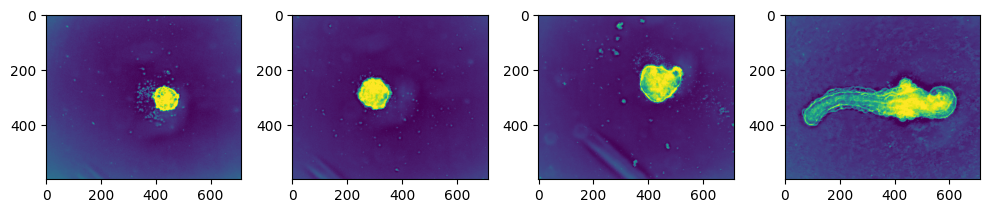

In [13]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,4,figsize=(10,5))
for i,ax in enumerate(axs):
    ax.imshow(out_bf[0][i][0])
plt.tight_layout()

In [16]:
quantile_scaled = np.expand_dims(quantile_scaled,2)
quantile_scaled.shape

(312, 4, 1, 598, 712)

In [17]:
quantile_scaled

array([[[[[0.02180466, 0.02415949, 0.0201685 , ..., 0.01582117,
           0.01617972, 0.        ],
          [0.01526441, 0.        , 0.01547447, ..., 0.        ,
           0.        , 0.02274685],
          [0.0084156 , 0.        , 0.01619818, ..., 0.0247098 ,
           0.02090478, 0.02518689],
          ...,
          [0.01098379, 0.        , 0.01213282, ..., 0.02526704,
           0.01364283, 0.        ],
          [0.01796835, 0.01854424, 0.01226441, ..., 0.02587425,
           0.01376242, 0.02809586],
          [0.01924568, 0.        , 0.01916982, ..., 0.01449659,
           0.01421379, 0.01330314]]],


        [[[0.06051895, 0.04045494, 0.05310079, ..., 0.04808354,
           0.04811152, 0.04293827],
          [0.04542484, 0.03633628, 0.04699142, ..., 0.04316816,
           0.04879251, 0.04319293],
          [0.04068446, 0.04206372, 0.04231509, ..., 0.0367576 ,
           0.04252875, 0.04270771],
          ...,
          [0.05057906, 0.0491423 , 0.0497948 , ..., 0.05116587,
  

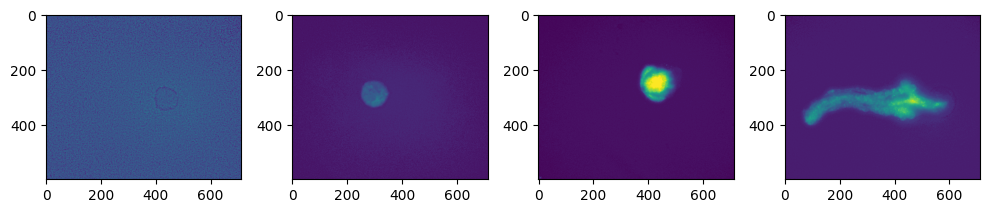

In [20]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,4,figsize=(10,5))
for i,ax in enumerate(axs):
    ax.imshow(quantile_scaled[0][i][0])
plt.tight_layout()

In [23]:
from tifffile import imsave

out_normalised = data_location + "/" +'Control_Dataset_4TP_Normalized_Across_Dataset'
if not os.path.isdir(out_normalised):
    os.mkdir(out_normalised)
    
for bf_tl, bra_tl, pth in zip(out_bf,quantile_scaled,img_list):
    norm = np.concat((bf_tl,bra_tl),axis=1)
    imsave(out_normalised+"/"+pth,norm)

/tmp/ipykernel_234092/3125441650.py:9: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave(out_normalised+"/"+pth,norm)


: 

In [18]:
import torchvision.transforms as trans
from torchvision.transforms import v2
from embed_time.transforms import CustomToTensor


loading_transforms = trans.Compose([
    CustomToTensor()
])

dataset_w_t = LiveTLSDataset(
    metadata,
    out_normalised,
    metadata_columns=["Run","Plate","ID"],
    return_metadata=True,
    transform = loading_transforms,
)

tensor, l, m = dataset_w_t[0]
tensor.shape

# Doesn't work need to make our own to tensor

torch.Size([4, 2, 598, 712])

In [19]:
from embed_time.transforms import SelectRandomTimepoint

sel_tp = SelectRandomTimepoint(time_dimension=0)

sel_tp(tensor).shape

torch.Size([2, 598, 712])